<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/6_3PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원(dimension)
- 이전 절까진 데이터가 가진 속성(attribute)를 feature라고 불렀음
- 과일 이미지의 경우 픽셀이 10,000개이니 10,000개의 feature인 셈
- 머신 러닝에선 이런 feature을 차원(dimension)이라고도 부름
- **1 차원 배열(벡터)일 경우에 원소의 개수를 의미함**

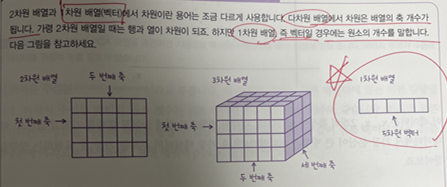

# 차원 축소(dimensionality reduction)
- 데이터를 가장 잘 나타내는 일부 feature를 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시킬 수 있음
- 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원도 가능
- 시각화도 쉬워짐

# PCA(Principal Component Analysis)

PCA는 고차원 데이터를 저차원 공간으로 변환하는 통계적 기법입니다. 데이터의 가장 중요한 정보(분산)를 최대한 유지하면서 새로운 축(주성분)을 찾아 데이터를 재구성합니다.

이때 **주성분 벡터의 원소 개수**는 원본 데이터셋에 있는 특성 개수와 같습니다.

그리고 **찾을 수 있는 주성분의 갯수**도 원본 특성의 개수만큼 찾을 수 있습니다.

**🎯 목적:**
*   **차원 축소**: 데이터의 복잡성을 줄이고 분석을 용이하게 합니다.
*   **데이터 시각화**: 고차원 데이터를 2D/3D로 표현 가능하게 합니다.
*   **노이즈 제거**: 미미한 변동(노이즈)을 제거합니다.
*   **모델 성능 향상**: 불필요한 특징을 줄여 과적합 방지 및 계산 효율성을 높입니다.

**⚙️ 작동 방식:**
1.  **최대 분산 방향 찾기**: 데이터가 가장 넓게 퍼져있는 방향을 첫 번째 주성분으로 설정합니다.
2.  **직교하는 다음 방향 찾기**: 첫 번째 주성분과 수직이면서 남아있는 분산을 가장 많이 설명하는 방향을 다음 주성분으로 찾습니다.
3.  **반복 및 투영**: 이 과정을 반복하여 주성분을 찾고, 원본 데이터를 이 주성분 축에 **직각 투영**하여 저차원 데이터를 얻습니다.

In [27]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2026-02-27 16:16:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-27 16:16:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-27 16:16:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [28]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) #3차원 배열을 2차원 배열로 변환(이미지 펼치기)
print(fruits_2d.shape)

(300, 10000)


In [29]:
from sklearn.decomposition import PCA #PCA 알고리즘
pca = PCA(n_components = 50) #n_components = 50 => 주성분 개수 50개로 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [30]:
print(pca.components_.shape) #components_ 속성에 PCA 클래스가 찾은 주성분 저장
#(주성분 개수, 원본 데이터의 feature 개수와 동일)

(50, 10000)


In [31]:
#이미지 출력 함수
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
  n = len(arr) #n은 샘플 개수
  #한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나눠 전체 행 개수 구하기
  rows = int(np.ceil(n/10))
  #각 행에 들어갈 이미지 개수
  cols = n if rows <2 else 10 #행이 하나면 열의 개수는 샘플 개수, 그렇지 않으면 10개
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j < n:
        axs[i, j].imshow(arr[i*10+j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

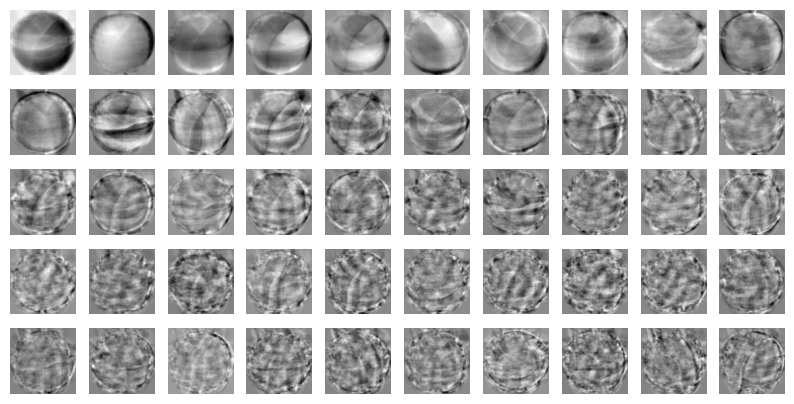

In [32]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [33]:
print(fruits_2d.shape)

(300, 10000)


In [34]:
fruits_pca = pca.transform(fruits_2d) #원본 데이터를 주성분에 투영하여 차원을 10,000에서 50으로 줄임
#transform() 메서드 사용
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성

In [35]:
fruits_inverse = pca.inverse_transform(fruits_pca) #inverse_transform() => 원본 데이터 재구성
print(fruits_inverse.shape)

(300, 10000)


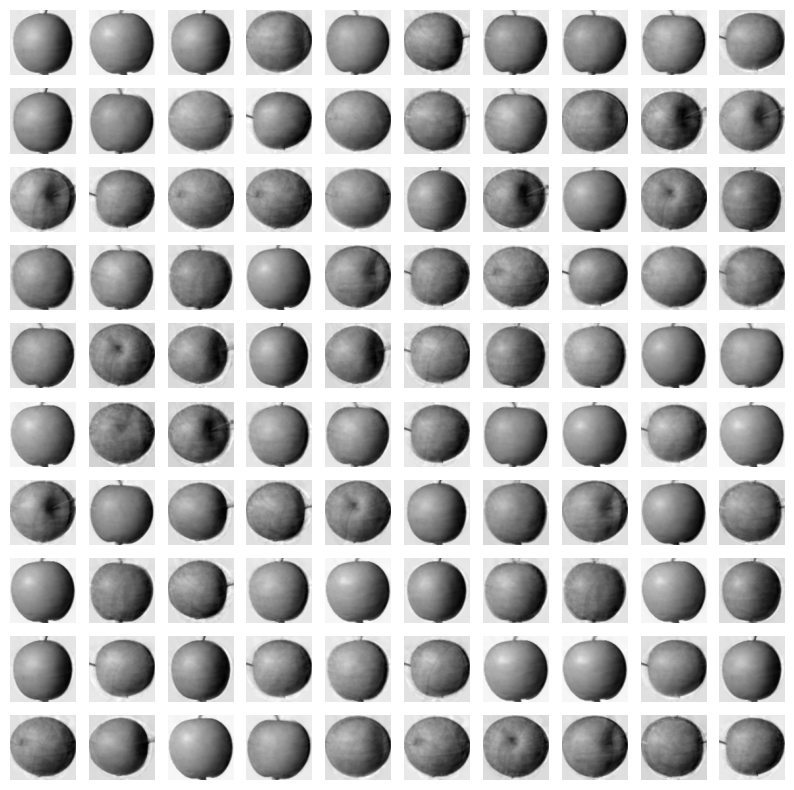

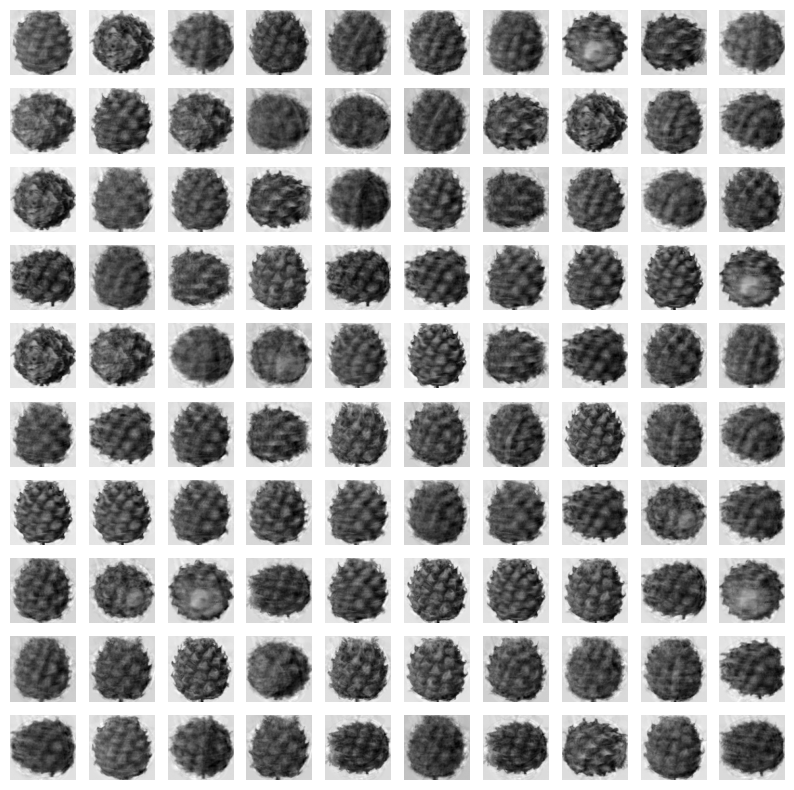

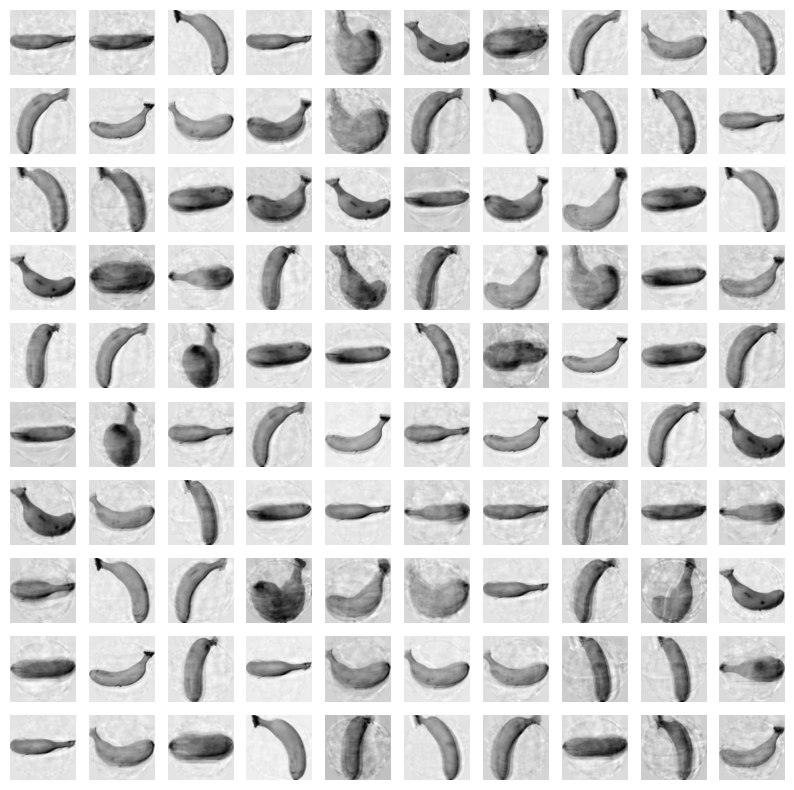

In [36]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]: #start = 0, 100, 200
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")
#

# 설명된 분산(Explaned variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio_에 각 주성분의 explained variance 비율이 기록되어있음
- 당연히 첫 번째 주성분의 explained variance 값이 가장 큼
근데 왜 당연하지?
- 재미나이 왈
  - 최대 분산 포착: PCA는 데이터에서 가장 큰 분산을 설명하는 방향을 찾아 첫 번째 주성분으로 설정합니다.

In [37]:
print(np.sum(pca.explained_variance_ratio_)) #explained_variance_ratio_ 모두 더해서 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

0.9215758322361234


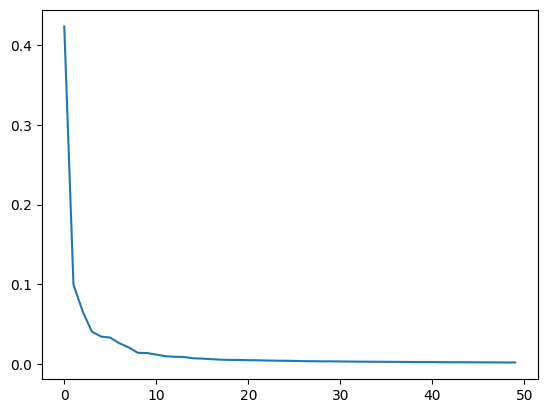

In [38]:
plt.plot(pca.explained_variance_ratio_) #explained_variance의 그래프 그려서 적절한 주성분의 개수 구하기
plt.show()
#처음 10개의 주성분이 대부분의 분산 표현

# **원본 데이터와 PCA로 축소한 데이터를 지도학습에 적용해서 차이점 알아보기**

**logistic regression**

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [40]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [44]:
#원본 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #훈련에 걸린 시간

0.9966666666666667
0.812316608428955


In [45]:
#PCA로 축소한 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #훈련에 걸린 시간

0.9966666666666667
0.027962970733642577


In [46]:
pca = PCA(n_components = 0.5) #원하는 explained variance 값 입력
#PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [47]:
print(pca.n_components_)
#주성분 2개만으로 원본 데이터의 분산의 50%를 표현할수있다니

2


**K-means algorithm**

In [54]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


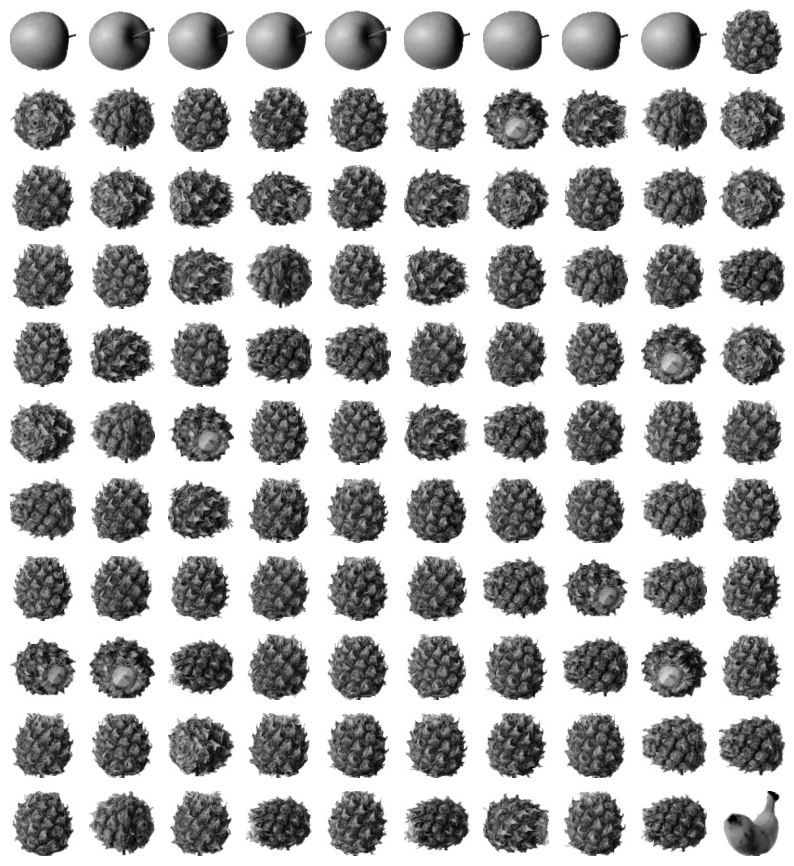

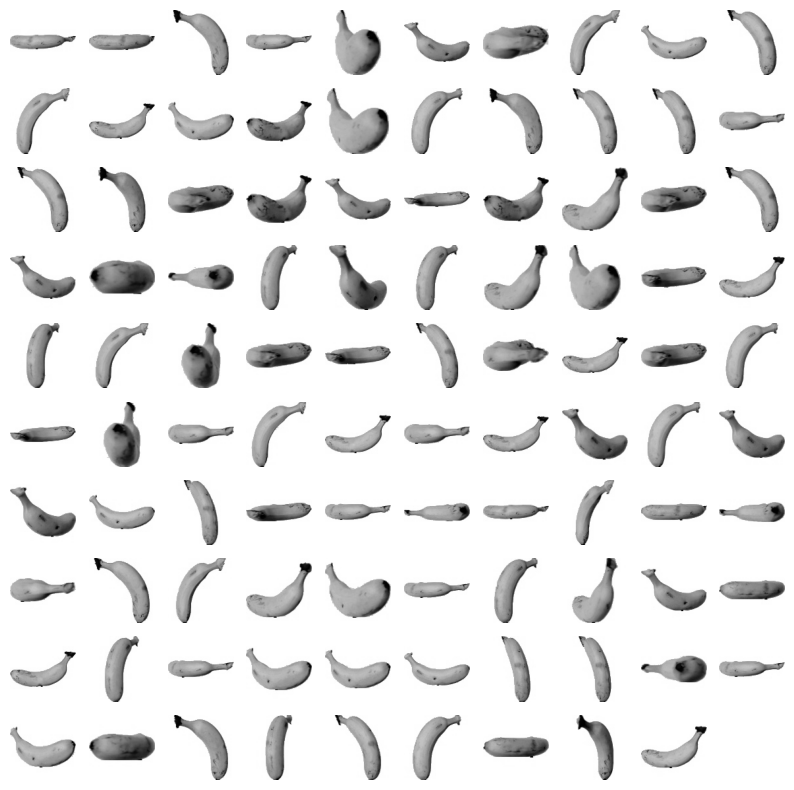

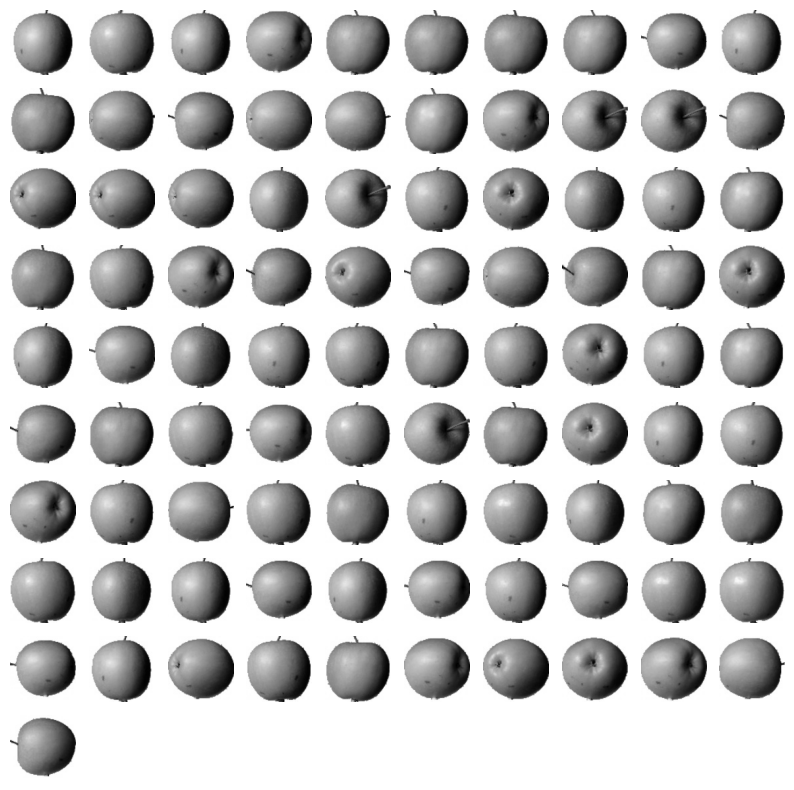

In [55]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

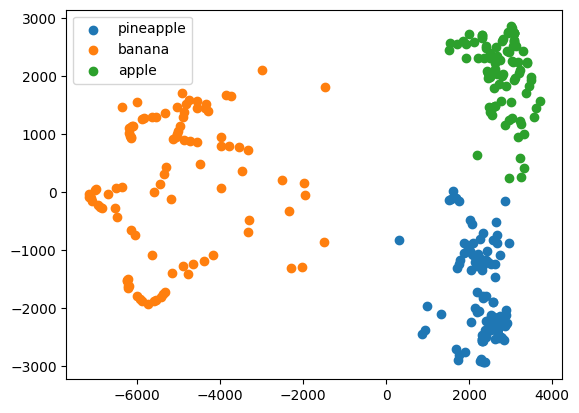

In [58]:
#
for label in range(0, 3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()